## Tunes and Tendencies: Exploring Mental Health
### Machine Learning Final Project

#### Name: Aditya Mittal
#### NetID: am13294

### Context
---
> Music therapy, or MT, is the use of music to improve an individual's stress mood, and overall mental health. MT is also recognized as an evidence-based practice, using music as a catalyst for "happy" hormones such as oxytocin.
>
> However, MT employs a wide range of different genres, varying from one organization to the next.
>
> The MxMH dataset aims to identify what, if any, correlations exist between an individual's music taste and their self-reported mental health. Ideally, these findings could contribute to a more informed application of MT or simply provide interesting sights about the mind.

#### Interpreting data

**Block 0: Background**

> Respondents answer generic questions focused on musical background and listening habits.

**Block 1: Music genres**

> Respondents rank how often they listen to 16 music genres, where they can select:
- Never
- Rarely
- Sometimes
- Very frequently

**Block 2: Mental health**

> Respondents rank Anxiety, Depression, Insomnia, and OCD on a scale of 0 to 10, where:
- 0 - I do not experience this.
- 10 - I experience this regularly, constantly/or to an extreme.

> Additional data that does not fall in these blocks may provide useful background information. See column descriptors.

#### Data collection

> Data collection was managed by [@catherinerasgaitis](https://www.linkedin.com/in/catherine-rasgaitis/) via a Google Form. Respondents were not restricted by age or location.
>
> The form was posted in various Reddit forums, Discord servers, and social media platforms. Posters and "business cards" were also used to advertise the form in libraries, parks, and other public locations.
>
> The form was relatively brief so that respondents would be more likely finish the survey. "Harder" questions (such as BPM) were left optional for the same reason.

### Step 1: Data Preprocessing and Analysis

---

- The code begins by importing required libraries such as NumPy, pandas, Matplotlib, and Seaborn.
- It loads the survey data from a CSV file into a pandas DataFrame named `survey_data`.
- The 'Permissions' and 'Timestamp' columns are dropped from the DataFrame as they are considered irrelevant to the analysis.
- The `info()` method is called to display information about the DataFrame, including column data types, non-null counts, and memory usage.
- The `head(10)` method is used to display the first 10 rows of the DataFrame for a quick overview.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the survey data into a pandas DataFrame
survey_data = pd.read_csv('data/mxmh_survey.csv')

# Drop 'Permissions' and 'Timestamp' columns as they are not relevant to the analysis
survey_data = survey_data.drop(['Permissions', 'Timestamp'], axis=1)

# Display basic information about the DataFrame and the first 10 rows
print(survey_data.info())
display(survey_data.head(10))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           735 non-null    float64
 1   Primary streaming service     735 non-null    object 
 2   Hours per day                 736 non-null    float64
 3   While working                 733 non-null    object 
 4   Instrumentalist               732 non-null    object 
 5   Composer                      735 non-null    object 
 6   Fav genre                     736 non-null    object 
 7   Exploratory                   736 non-null    object 
 8   Foreign languages             732 non-null    object 
 9   BPM                           629 non-null    float64
 10  Frequency [Classical]         736 non-null    object 
 11  Frequency [Country]           736 non-null    object 
 12  Frequency [EDM]               736 non-null    object 
 13  Frequ

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve
7,21.0,Spotify,1.0,Yes,No,No,K pop,Yes,Yes,95.0,...,Sometimes,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,3.0,Improve
8,19.0,Spotify,6.0,Yes,No,No,Rock,No,No,94.0,...,Never,Never,Never,Very frequently,Never,2.0,0.0,0.0,0.0,Improve
9,18.0,I do not use a streaming service.,1.0,Yes,No,No,R&B,Yes,Yes,155.0,...,Sometimes,Sometimes,Rarely,Sometimes,Sometimes,2.0,2.0,5.0,1.0,Improve


In [2]:
#Rename the answers in "Primary streaming service" column for simplicity
survey_data['Primary streaming service'] = survey_data['Primary streaming service'].replace({
    'I do not use a streaming service.': 'None',
    'Other streaming service': 'Other',
})


- The code selects three numerical features ('Age', 'Hours per day', 'BPM') from the `survey_data` DataFrame.
- The `describe()` method is used to generate summary statistics for these numerical features, including count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum.
- The resulting summary statistics are stored in the variable `numerical_summary`.

In [3]:
# Inspect the summary statistics of selected numerical features: 'Age', 'Hours per day', and 'BPM'
numerical_summary = survey_data[['Age', 'Hours per day', 'BPM']].describe()

# Display the summary statistics
numerical_summary

,Age,Hours per day,BPM
count,735.000000,736.000000,6.290000e+02
mean,25.206803,3.572758,1.589948e+06
std,12.054970,3.028199,3.987261e+07
min,10.000000,0.000000,0.000000e+00
25%,18.000000,2.000000,1.000000e+02
50%,21.000000,3.000000,1.200000e+02
75%,28.000000,5.000000,1.440000e+02
max,89.000000,24.000000,1.000000e+09



- The code identifies outliers in the DataFrame by filtering rows based on certain conditions related to the 'BPM' and 'Hours per day' features based on common sense and intuition.
- Outliers are defined as rows where 'BPM' is less than or equal to 0, 'BPM' is greater than or equal to 300, or 'Hours per day' is greater than or equal to 20.
- The resulting DataFrame of outliers is stored in the variable `outliers`.

In [4]:
# Identify and display outliers in the 'BPM' and 'Hours per day' features
outliers = survey_data[(survey_data['BPM'] <= 0) | (survey_data['BPM'] >= 300) | (survey_data['Hours per day'] >= 20)]

# Display the rows containing outliers
outliers

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
18,17.0,Spotify,24.0,Yes,No,No,Rap,Yes,No,99.0,...,Rarely,Sometimes,Very frequently,Very frequently,Never,7.0,5.0,0.0,3.0,Improve
290,27.0,Spotify,20.0,Yes,No,No,Rock,Yes,Yes,NaN,...,Rarely,Never,Rarely,Very frequently,Sometimes,8.0,10.0,10.0,8.0,No effect
339,35.0,Spotify,3.0,No,Yes,No,Folk,Yes,No,0.0,...,Rarely,Never,Never,Sometimes,Sometimes,8.0,2.0,2.0,8.0,No effect
366,16.0,Spotify,24.0,Yes,No,No,Rock,Yes,Yes,120.0,...,Rarely,Rarely,Rarely,Sometimes,Rarely,5.0,1.0,9.0,1.0,Improve
524,28.0,Spotify,3.0,No,Yes,Yes,Metal,Yes,Yes,0.0,...,Rarely,Sometimes,Never,Very frequently,Very frequently,8.0,8.0,5.0,2.0,Improve
568,16.0,Spotify,7.0,Yes,No,No,Video game music,Yes,No,999999999.0,...,Sometimes,Never,Very frequently,Rarely,Sometimes,4.0,8.0,8.0,4.0,No effect
639,30.0,None,0.0,No,No,No,Metal,No,No,0.0,...,Never,Never,Rarely,Rarely,Rarely,10.0,10.0,10.0,9.0,Improve
644,16.0,Other,4.0,Yes,No,No,EDM,Yes,Yes,624.0,...,Never,Never,Never,Never,Sometimes,4.0,7.0,1.0,3.0,Improve
695,89.0,Spotify,24.0,Yes,Yes,Yes,Rap,No,No,143.0,...,Rarely,Sometimes,Very frequently,Rarely,Never,0.0,0.0,0.0,0.0,No effect



- The code drops the rows containing outliers from the DataFrame `survey_data` using the `drop()` method. The indices of the identified outliers are used for removal.
- After removing outliers, the summary statistics for the numerical features ('Age', 'Hours per day', and 'BPM') are computed using the `describe()` method and stored in the variable `numerical_summary_after_removal`.
- The updated summary statistics are then displayed.

In [5]:
# Drop identified outliers from the DataFrame
survey_data = survey_data.drop(outliers.index)

# Inspect the summary statistics of selected numerical features after removing outliers: 'Age', 'Hours per day', and 'BPM'
numerical_summary_after_removal = survey_data[['Age', 'Hours per day', 'BPM']].describe()

# Display the updated summary statistics
numerical_summary_after_removal

,Age,Hours per day,BPM
count,726.000000,727.000000,621.000000
mean,25.141873,3.467056,123.227053
std,11.869543,2.672376,32.954930
min,10.000000,0.000000,4.000000
25%,18.000000,2.000000,100.000000
50%,21.000000,3.000000,120.000000
75%,27.750000,5.000000,144.000000
max,80.000000,18.000000,220.000000



- The code uses the Seaborn library to visualize the distribution of three features ('Age', 'Hours per day', and 'BPM') in separate subplots.
- The `sns.histplot()` function is used to create histograms with Kernel Density Estimation (KDE) overlays for a smoother representation of the distribution.
- Subplots are organized in a single row with three columns, and the figure size is set to (20, 6) for better visibility.
- Titles are set for each subplot to indicate the feature being visualized.
- Finally, the `plt.show()` function is called to display the plots.

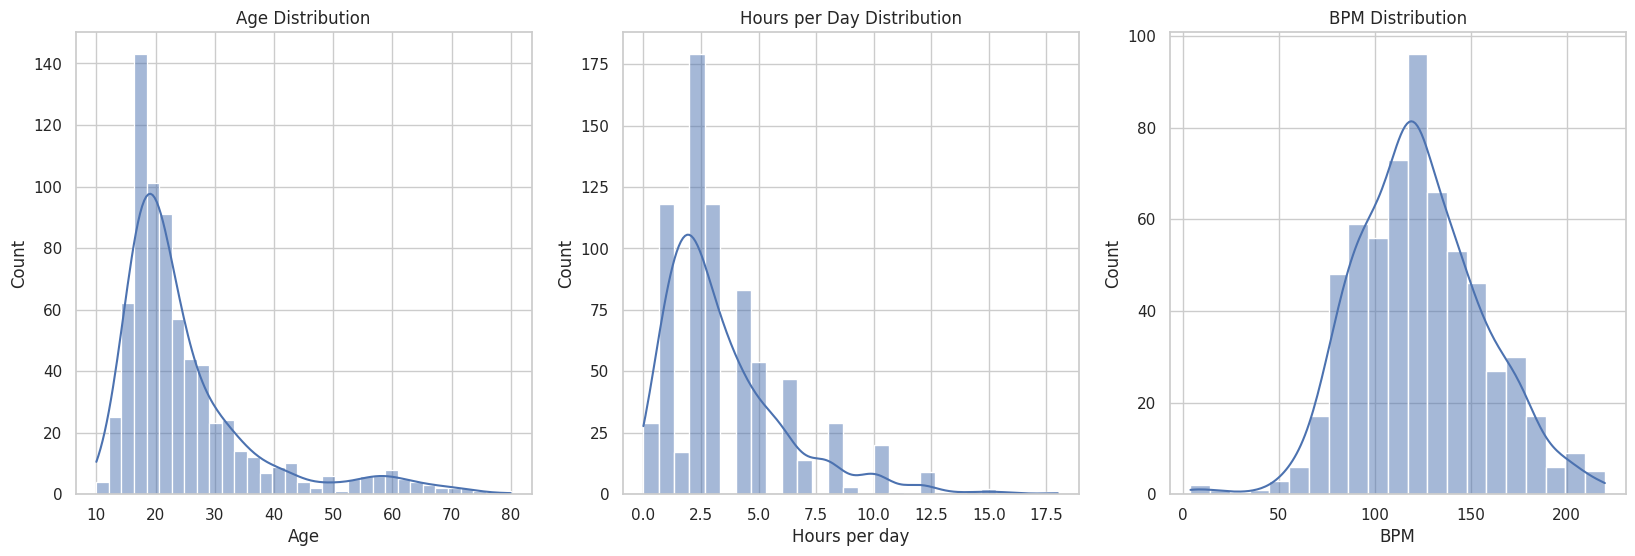

In [6]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Plot the distribution of 'Age' with KDE
sns.histplot(survey_data['Age'], kde=True, ax=axes[0]).set(title='Age Distribution')

# Plot the distribution of 'Hours per day' with KDE
sns.histplot(survey_data['Hours per day'], kde=True, ax=axes[1]).set(title='Hours per Day Distribution')

# Plot the distribution of 'BPM' with KDE
sns.histplot(survey_data['BPM'], kde=True, ax=axes[2]).set(title='BPM Distribution')

# Show the plots
plt.show()


**Summary of Observations:**
- The age distribution is right-skewed, indicating that most responders are teenagers.
- The hours per day distribution is also right-skewed, with a peak in the 2-4 hours range, suggesting that a significant number of responders listen to music for this duration.
- The BPM distribution shows a normal curve with a peak around 120 BPM, suggesting a common preference for music with a moderate tempo.

---
- The next code segment creates age groups for the survey respondents.
- Age groups are defined using bins and labels, and a new column 'Age Group' is added to the DataFrame using the `pd.cut()` function.
- A bar plot is then created using Seaborn to visualize the distribution of primary streaming services across different age groups.
- The x-axis represents age groups, the y-axis represents the count of respondents, and bars are colored by the primary streaming service.
- Labels, title, legend, and x-axis label rotation are set to enhance the clarity of the visualization.
- Finally, the plot is displayed using `plt.show()`.

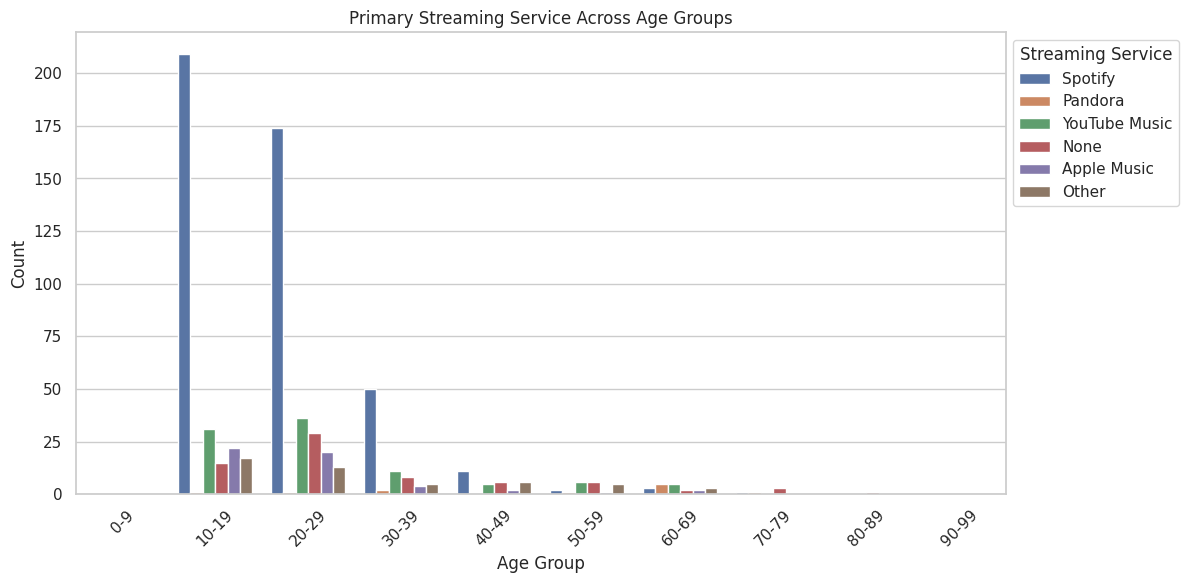

In [7]:
# Create age groups
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = [f'{i}-{i+9}' for i in range(0, 100, 10)]
survey_data['Age Group'] = pd.cut(survey_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Use Seaborn to create a bar plot
sns.countplot(x='Age Group', hue='Primary streaming service', data=survey_data)

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Primary Streaming Service Across Age Groups')

# Display legend
plt.legend(title='Streaming Service', bbox_to_anchor=(1, 1))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


**Summary of Observations:**
- Spotify is overwhelmingly the preferred streaming service across all age groups, indicating its widespread popularity.

- The other streaming services are comparable in usage across different age groups with YouTube Music being the second most popular streaming service and leading the rest of the pack for most age groups.
- Pandora is rarely used and is predominantly used by the older generation.

---
- The next code segment creates a box plot using Seaborn to visualize the genre-wise distribution of survey respondents across different age groups.
- The y-axis represents favorite genres, the x-axis represents age, and the box plot provides insights into the distribution of age within each favorite genre category.
- Labels, title, and x-axis label rotation are set for better readability.
- Finally, the plot is displayed using `plt.show()`.

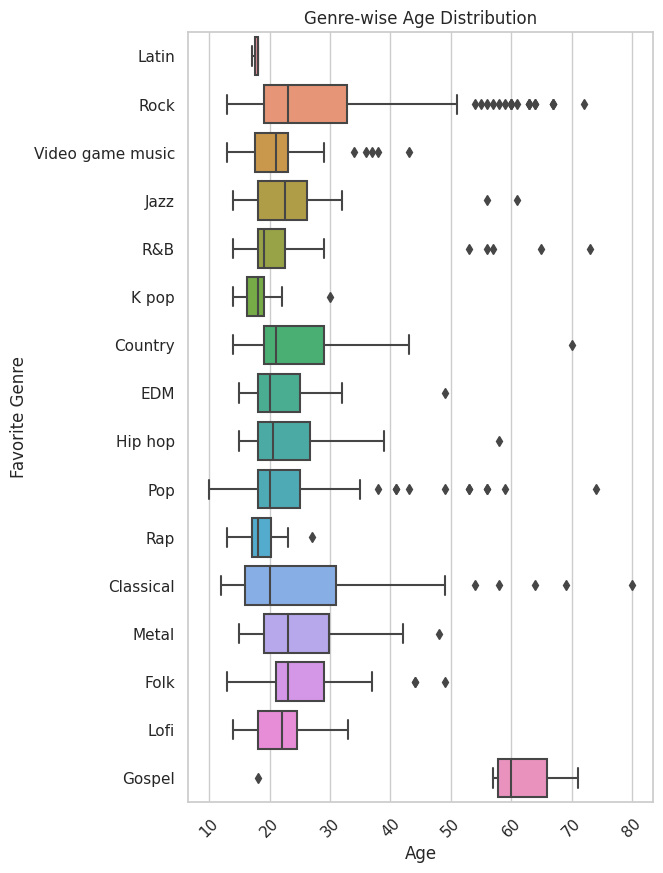

In [8]:
# Set up the figure and axis
plt.figure(figsize=(6, 10))

# Use Seaborn to create a box plot
sns.boxplot(y='Fav genre', x='Age', data=survey_data)

# Set labels and title
plt.ylabel('Favorite Genre')
plt.xlabel('Age')
plt.title('Genre-wise Age Distribution')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Summary of Observations:**
- Rock music preference is widespread and spans across all age groups.
- Genres like Rap, R&B, Lo-fi, and K-pop are more preferred by younger individuals, suggesting a generational trend in music preferences.



---
- The next code segment creates a set of subplots using Seaborn's box plot to visualize the distribution of responses to three attributes ("While working," "Exploratory," "Foreign languages") across different age groups.
- Each subplot focuses on one attribute, and the x-axis represents age groups, while the y-axis represents the corresponding attribute.
- Labels, titles, and subplot arrangements are configured for better interpretation and readability.
- The `plt.tight_layout()` function is used to improve the layout of subplots.
- Finally, the plot is displayed using `plt.show()`.

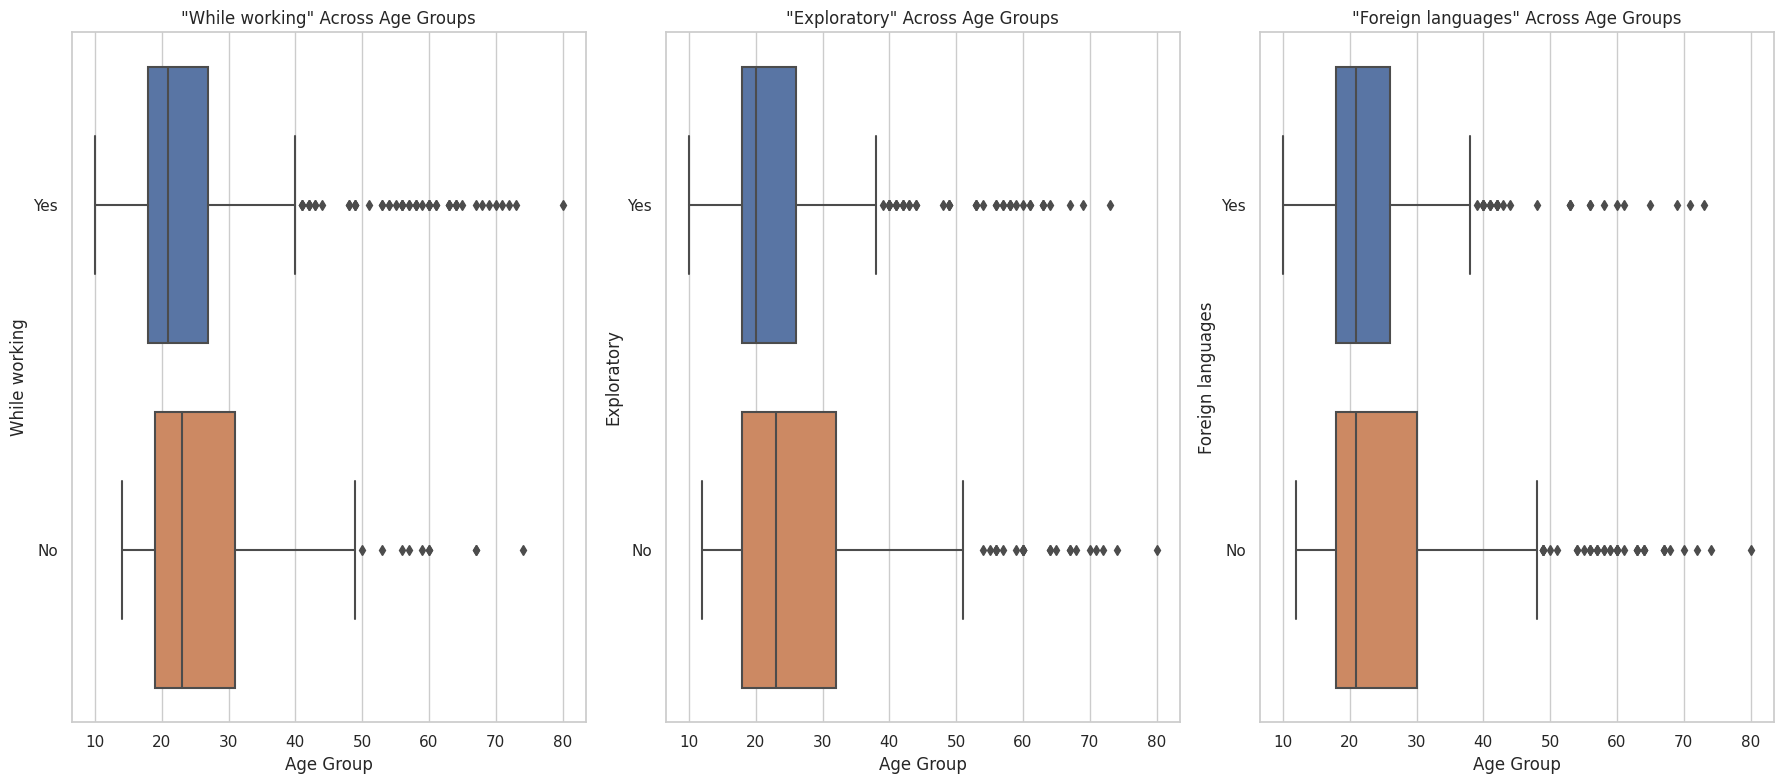

In [9]:
# Set up the figure and axis
plt.figure(figsize=(18, 8))

# Define the list of attributes
attributes = ["While working", "Exploratory", "Foreign languages"]

# Create subplots
for i, attribute in enumerate(attributes, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=survey_data['Age'], y=survey_data[attribute])

    # Set labels and title for each subplot
    plt.xlabel('Age Group')
    plt.ylabel(attribute)
    plt.title(f'"{attribute}" Across Age Groups')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



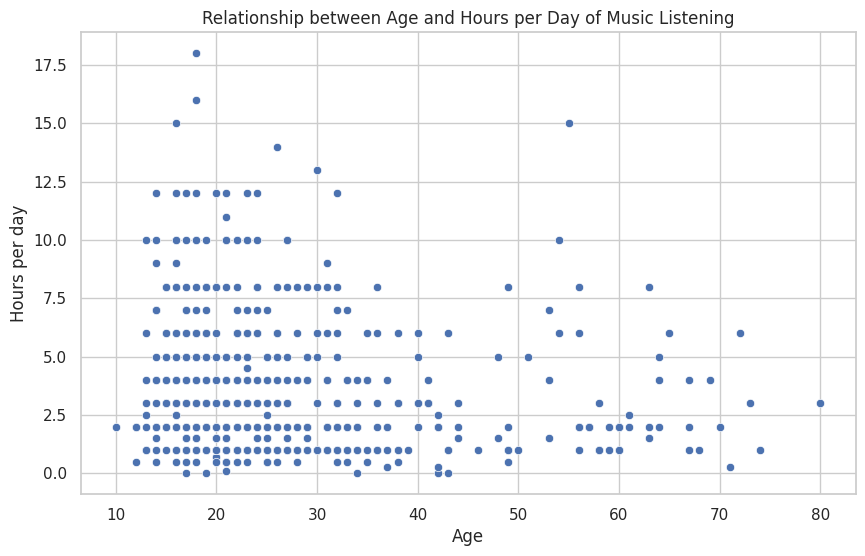

In [10]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Use Seaborn to create a scatter plot
sns.scatterplot(x='Age', y='Hours per day', data=survey_data)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Hours per day')
plt.title('Relationship between Age and Hours per Day of Music Listening')

# Show the plot
plt.show()


**Summary of Observations:**
- The scatter plot indicates a slight trend where younger individuals tend to listen to more music daily compared to older age groups.


---
- The next code segment creates a set of subplots using Seaborn's boxen plot to visualize the distribution of responses to four mental conditions ("Anxiety," "Depression," "Insomnia," "OCD") across different age groups.
- Each subplot focuses on one mental condition, and the x-axis represents age groups, while the y-axis represents the corresponding mental condition.
- Y-axis limits are set to ensure consistency in visualization across subplots.
- Labels, titles, and subplot arrangements are configured for better interpretation and readability.
- The `plt.tight_layout()` function is used to improve the layout of subplots.
- Finally, the plot is displayed using `plt.show()`.

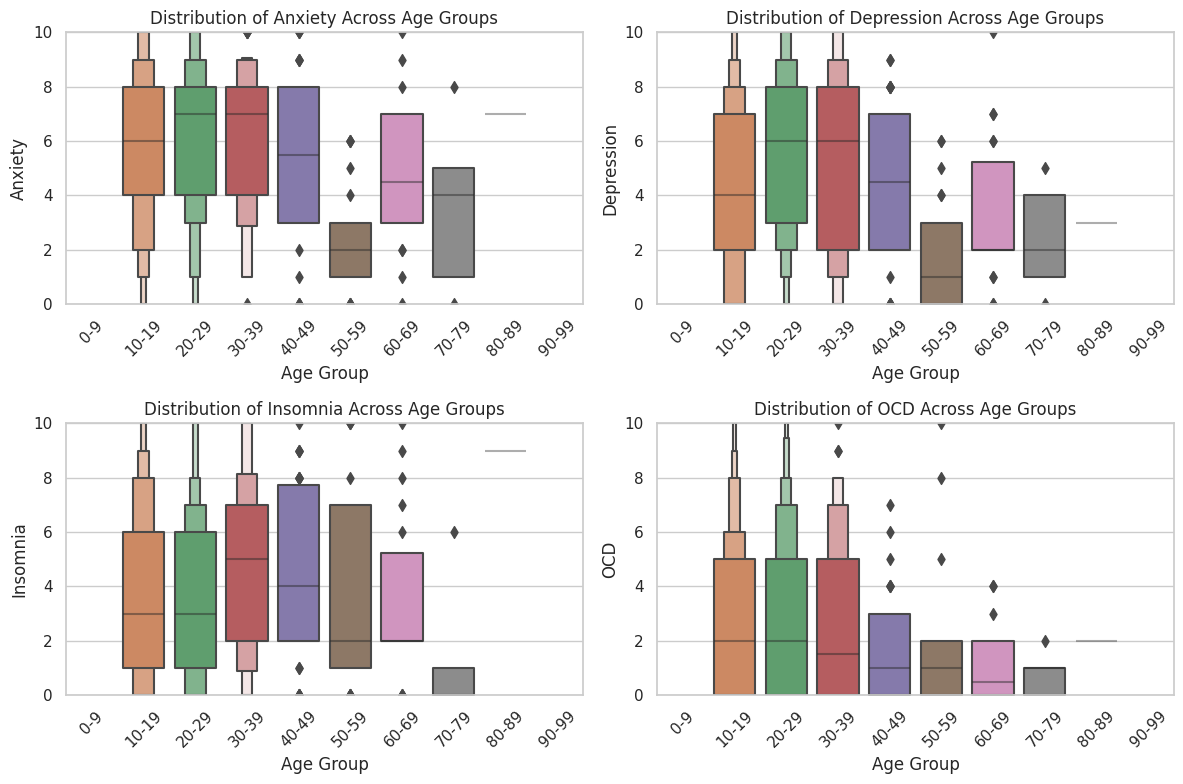

In [11]:
# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Define the list of mental conditions
mental_conditions = ["Anxiety", "Depression", "Insomnia", "OCD"]

# Create subplots
for i, condition in enumerate(mental_conditions, 1):
    plt.subplot(2, 2, i)
    sns.boxenplot(x='Age Group', y=condition, data=survey_data)

    # Set y-axis limits
    plt.ylim(0, 10)

    # Set labels and title for each subplot
    plt.xlabel('Age Group')
    plt.ylabel(condition)
    plt.title(f'Distribution of {condition} Across Age Groups')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


**Summary of Observations:**
- Teenagers between the ages of 10-29 report feeling more anxious than any other generation, which may be attributed to increased awareness and focus on anxiety as a mental disorder in recent times or potential external factors such as school shootings.
- The working class, particularly those after the age of 30, report a higher degree of insomnia than younger generations.
- Age groups after 50 report fewer mental disorders compared to other age groups. This could be due to potential data limitations on the older generation or a genuine trend indicating less awareness or occurrence of mental disorders in this age group.

-------
- The next code segment creates a set of subplots using Seaborn's count plot to visualize the relationship between favorite music genres and the effects of music on four mental conditions ("Anxiety," "Depression," "Insomnia," "OCD").
- Each subplot focuses on one mental condition, and the x-axis represents favorite music genres, while the hue represents the effects of music on the corresponding mental condition.
- Only respondents with a reported value greater than 0 for the specific mental condition are included in the analysis.
- Labels, titles, and subplot arrangements are configured for better interpretation and readability.
- The `plt.tight_layout()` function is used to improve the layout of subplots.
- Finally, the plot is displayed using `plt.show()`.

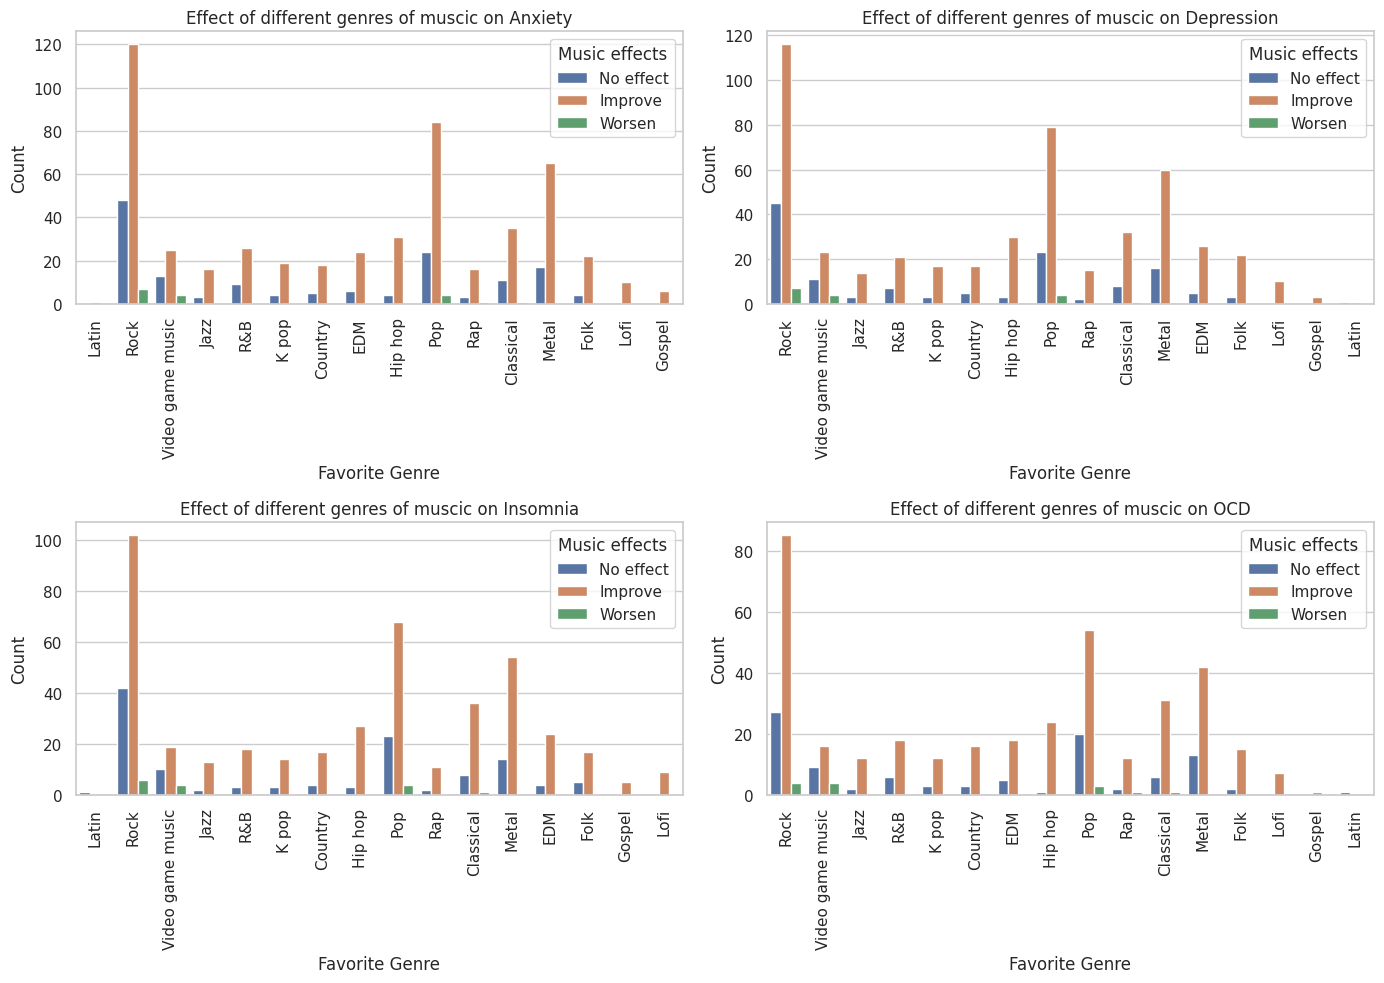

In [12]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Define the list of mental conditions
mental_conditions = ["Anxiety", "Depression", "Insomnia", "OCD"]

# Create subplots for each mental condition
for i, condition in enumerate(mental_conditions):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # Use Seaborn to create count plots with hue
    sns.countplot(x='Fav genre', hue='Music effects', data=survey_data[survey_data[condition] > 0], ax=ax)

    # Set labels and title for each subplot
    ax.set_xlabel('Favorite Genre')
    ax.set_ylabel('Count')
    ax.set_title(f'Effect of different genres of muscic on {condition}')

    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


**Summary of Observations:**
- Respondents with anxiety who listened to Latin, Lofi, and Gospel reported improved conditions only.
- Those with depression who listened to Latin and Gospel reported improved conditions only.
- Individuals with insomnia who listened to Lofi and Gospel reported improved conditions only.
- Respondents with OCD who listened to Lofi and Gospel reported improved conditions only. Latin music had no effect on OCD.


### Step 2: Data Cleaning and Handling

---

- The next code segment addresses null values in the dataset by printing the sum of null values for each column using `survey_data.isnull().sum()`.
- The output will provide information on the number of missing values in each column, helping identify areas that may require handling, such as imputation or removal of missing data.
- This step is essential for ensuring the completeness and accuracy of the dataset before further analysis.

In [13]:
# Handle null values
survey_data.isnull().sum()

Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             106
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  


- As BPM has over 100 missing values, we decide to impute them. The code calculates the genre-wise median of the BPM values and the count of missing values for each genre in the 'Fav genre' column.
- Rows with missing BPM values are imputed based on the genre-wise median if the count of missing values for that genre is greater than 3.
- The function `impute_bpm` is defined to handle the imputation logic.
- Rows with missing values are dropped after imputation, and the index is reset.
- The final genre-wise analysis is displayed after the imputation process.

In [14]:
# Calculate the genre-wise median of the BPM values and count of missing values

def countna(df_group):
    return df_group.isna().sum()

# Group by 'Fav genre' and calculate median BPM and count of missing values
genre_wise_analysis = survey_data.groupby('Fav genre')['BPM'].agg(['median', countna])

# Display the initial genre-wise analysis
display(genre_wise_analysis)

,median,countna
Fav genre,,
Classical,117.5,13
Country,109.0,4
EDM,128.0,1
Folk,116.0,4
Gospel,87.5,2
Hip hop,111.5,3
Jazz,120.0,1
K pop,124.0,1
Latin,156.0,0


In [15]:
# Impute rows where count of missing values of 'BPM' is greater than 3
impute_genres = list(genre_wise_analysis[genre_wise_analysis['countna'] > 3].index)

# Define a function to impute BPM values based on genre-wise median
def impute_bpm(row):
    if pd.isnull(row['BPM']) and row['Fav genre'] in impute_genres:
        return genre_wise_analysis.loc[row['Fav genre'], 'median']
    else:
        return row['BPM']

# Apply the imputation function to the 'BPM' column
survey_data['BPM'] = survey_data.apply(impute_bpm, axis=1)

# Drop remaining rows with null values and reset the index
survey_data = survey_data.dropna().reset_index(drop=True)

# Group by 'Fav genre' and recalculate median BPM and count of missing values after imputation
genre_wise_analysis_after_imputation = survey_data.groupby('Fav genre')['BPM'].agg(['median', countna])

# Display the genre-wise analysis after imputation
display(genre_wise_analysis_after_imputation)

,median,countna
Fav genre,,
Classical,117.5,0
Country,109.0,0
EDM,128.0,0
Folk,116.0,0
Gospel,87.5,0
Hip hop,111.5,0
Jazz,120.0,0
K pop,124.0,0
Latin,122.5,0


- The code uses the `MinMaxScaler` from scikit-learn to scale the selected numerical features ('Age', 'Hours per day', 'BPM') in the `survey_data` DataFrame.
- The `fit_transform` method is applied to scale the features within the specified range (0 to 10).
- The selected numerical features ('Age', 'Hours per day', 'BPM') in survey_data_encoded are replaced with the scaled values obtained from survey_data_scaled.

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Extract and scale selected numerical features ('Age', 'Hours per day', 'BPM')
selected_features = ['Age', 'Hours per day', 'BPM']
scaler = MinMaxScaler(feature_range=(0, 10))
survey_data_scaled = scaler.fit_transform(survey_data[selected_features])

# Display the scaled data
display(survey_data_scaled)


array([[1.14285714, 2.22222222, 5.92592593],
       [7.28571429, 1.38888889, 3.7037037 ],
       [1.14285714, 2.22222222, 4.76851852],
       ...,
       [1.28571429, 3.33333333, 5.37037037],
       [1.28571429, 2.77777778, 7.68518519],
       [2.71428571, 1.11111111, 4.35185185]])

In [17]:
survey_data_encoded = survey_data.copy()
survey_data_encoded[['Age', 'Hours per day', 'BPM']] = pd.DataFrame(survey_data_scaled)

display(survey_data_encoded[['Age', 'Hours per day', 'BPM']].describe())

,Age,Hours per day,BPM
count,702.000000,702.000000,702.000000
mean,2.146113,1.934789,5.511337
std,1.658364,1.473835,1.432188
min,0.000000,0.000000,0.000000
25%,1.142857,1.111111,4.675926
50%,1.571429,1.666667,5.370370
75%,2.428571,2.777778,6.296296
max,10.000000,10.000000,10.000000


- We now perform several transformations on the `survey_data_encoded` DataFrame:
  1. Converts boolean attributes to boolean values.
  2. Combines boolean features 'Instrumentalist' and 'Composer' into a new column 'Musician'.
  3. Combines boolean features 'Exploratory' and 'Foreign languages' into a new column 'Exploration'.
  4. Drops the original boolean columns.
  5. Converts ordinal categorical attributes for genres' listening frequency to a specified order.
  6. Converts the 'Music effects' column to the "category" datatype with a specified order.
  7. Encodes remaining nominal categorical attributes using LabelEncoder.
  8. Applies OrdinalEncoder on category type attributes.
- The updated data information is displayed using `info()`.
- Both the original and encoded data are displayed for comparison.


In [18]:
# Convert boolean attributes to boolean values
boolean_attributes = ['While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages']
survey_data_encoded[boolean_attributes] = survey_data_encoded[boolean_attributes].replace({'Yes': True, 'No': False})

# Combine boolean features ['Instrumentalist', 'Composer']
survey_data_encoded['Musician'] = survey_data_encoded[['Instrumentalist', 'Composer']].apply(
    lambda row: 'Both' if row[0] and row[1] else 'Instrumentalist' if row[0] else 'Composer' if row[1] else 'None', axis=1
)

# Combine boolean features ['Exploratory', 'Foreign languages']
survey_data_encoded['Exploration'] = survey_data_encoded[['Exploratory', 'Foreign languages']].apply(
    lambda row: 'Both' if row[0] and row[1] else 'Exploratory' if row[0] else 'Foreign languages' if row[1] else 'None', axis=1
)

# Drop the original boolean columns
survey_data_encoded = survey_data_encoded.drop(['Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages'], axis=1)

In [19]:
# Ordinal Categorical Attributes for genres' listening Frequency
genres = list(survey_data_encoded.filter(regex='Frequency').columns)
genre_order = ['Never', 'Rarely', 'Sometimes', 'Very frequently']
survey_data_encoded[genres] = survey_data_encoded[genres].apply(lambda x: pd.Categorical(x, categories=genre_order, ordered=True))

# Convert 'Music effects' column to "category" datatype
effect_order = ['Worsen', 'No effect', 'Improve']
survey_data_encoded['Music effects'] = pd.Categorical(survey_data_encoded['Music effects'], categories=effect_order, ordered=True)

In [21]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Remaining Nominal Categorical Attributes
encoder = LabelEncoder()
object_cols = survey_data_encoded.select_dtypes(include='object').columns
survey_data_encoded[object_cols] = survey_data_encoded[object_cols].apply(lambda col: encoder.fit_transform(col))

# Use OrdinalEncoder on category type attributes
category_cols = survey_data_encoded.select_dtypes(include='category').columns
encoder_category = OrdinalEncoder(categories='auto')
survey_data_encoded[category_cols] = encoder_category.fit_transform(survey_data_encoded[category_cols])

# Display the updated data information
print(survey_data_encoded.info())

# Display both original and encoded data
display(survey_data.head(), survey_data_encoded.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           702 non-null    float64
 1   Primary streaming service     702 non-null    int64  
 2   Hours per day                 702 non-null    float64
 3   While working                 702 non-null    bool   
 4   Fav genre                     702 non-null    int64  
 5   BPM                           702 non-null    float64
 6   Frequency [Classical]         702 non-null    float64
 7   Frequency [Country]           702 non-null    float64
 8   Frequency [EDM]               702 non-null    float64
 9   Frequency [Folk]              702 non-null    float64
 10  Frequency [Gospel]            702 non-null    float64
 11  Frequency [Hip hop]           702 non-null    float64
 12  Frequency [Jazz]              702 non-null    float64
 13  Frequ

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Age Group
0,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,10-19
1,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,60-69
2,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,10-19
3,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,10-19
4,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,10-19


,Age,Primary streaming service,Hours per day,While working,Fav genre,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Age Group,Musician,Exploration
0,1.142857,4,2.222222,False,15,5.925926,0.0,0.0,3.0,0.0,...,1.0,3.0,7.0,7.0,10.0,2.0,1.0,0.0,3,2
1,7.285714,5,1.388889,True,6,3.703704,2.0,0.0,0.0,1.0,...,0.0,0.0,9.0,7.0,3.0,3.0,0.0,5.0,1,0
2,1.142857,4,2.222222,True,12,4.768519,0.0,0.0,1.0,0.0,...,0.0,1.0,7.0,2.0,5.0,9.0,0.0,0.0,3,1
3,1.142857,4,2.777778,True,6,3.796296,1.0,2.0,0.0,0.0,...,3.0,0.0,8.0,8.0,7.0,7.0,0.0,0.0,0,0
4,1.142857,5,1.666667,True,15,2.870370,2.0,0.0,1.0,2.0,...,0.0,2.0,4.0,8.0,6.0,0.0,0.0,0.0,2,0


### Step 3: Model Building

---


- We now separate the features (`X`) and target variables (`y`) from the `survey_data_encoded` DataFrame.
- Principal Component Analysis (PCA) is applied to reduce the dimensionality of the features to 19 components.
- The reduced features are displayed, and the shape of the reduced features is printed.
- The data is split into training and testing sets using `train_test_split` with a test size of 20%.

In [22]:
# Separate features (X) and target variables (y)
X = survey_data_encoded.drop(['Anxiety', 'Depression', 'Insomnia', 'OCD'], axis=1)
y = survey_data_encoded[['Anxiety', 'Depression', 'Insomnia', 'OCD']]

In [24]:
# Perform Principal Component Analysis (PCA) with 19 components
from sklearn.decomposition import PCA
pca = PCA(n_components=19, random_state=42)
X_reduced = pca.fit_transform(X)

# Display the reduced features
display(X_reduced)
print("Shape of X_reduced:", X_reduced.shape)

array([[-5.52254567, -1.81836031, -1.55460159, ..., -0.41657014,
        -1.15790402, -1.04231826],
       [ 3.74949382,  5.1266624 ,  4.27825276, ..., -0.3635875 ,
         0.39553502,  0.08517553],
       [-2.32871008, -2.83052667,  1.48142637, ..., -0.84492244,
         0.50149184, -0.42446791],
       ...,
       [-3.2980279 , -2.03808396,  1.35920494, ..., -0.24507784,
        -0.54824325,  0.50333062],
       [ 9.65386709,  0.57782177, -3.81507028, ..., -0.06737422,
         0.35406298, -0.27005063],
       [ 4.57140512, -1.21084342,  3.31132999, ...,  0.64410463,
        -0.78346275, -1.40469687]])

Shape of X_reduced: (702, 19)


In [25]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced.astype('float32'), y.astype('float32'), test_size=0.2, random_state=42)

#### Regression Algorithms




- The code defines a list of regression models (`reg_models`) and target attributes (`target_attributes`).
- An empty DataFrame (`reg_analysis`) with columns for model evaluation metrics is created and displayed.
- The `perform_regression_analysis` function is defined to update the `reg_analysis` DataFrame with R^2 and RMSE scores for both training and testing sets.
- The function takes the model name, target attribute, and the predicted values for both training and testing sets.

In [26]:
from sklearn.metrics import r2_score, mean_squared_error

# Regression Models
reg_models = ['Linear Regression Model', 'Random Forest Regression Model', 'SVM Regression Model']
target_attributes = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

# Create an empty DataFrame with columns for model evaluation metrics
empty_df = [(x, y, None, None, None, None) for y in target_attributes for x in reg_models]
reg_analysis = pd.DataFrame(empty_df, columns=["Model", "Target", "R^2 (train)", "R^2 (test)", "RMSE (train)", "RMSE (test)"])\
                .set_index(["Model", "Target"])

# Display the empty regression analysis DataFrame
display(reg_analysis)

def perform_regression_analysis(model_name, target, y_pred_train, y_pred_test):
    reg_analysis.loc[(model_name, target), "R^2 (train)"] = r2_score(y_train[target], y_pred_train)
    reg_analysis.loc[(model_name, target), "RMSE (train)"] = mean_squared_error(y_train[target], y_pred_train, squared=False)

    reg_analysis.loc[(model_name, target), "R^2 (test)"] = r2_score(y_test[target], y_pred_test)
    reg_analysis.loc[(model_name, target), "RMSE (test)"] = mean_squared_error(y_test[target], y_pred_test, squared=False)


,,R^2 (train),R^2 (test),RMSE (train),RMSE (test)
Model,Target,,,,
Linear Regression Model,Anxiety,None,None,None,None
Random Forest Regression Model,Anxiety,None,None,None,None
SVM Regression Model,Anxiety,None,None,None,None
Linear Regression Model,Depression,None,None,None,None
Random Forest Regression Model,Depression,None,None,None,None
SVM Regression Model,Depression,None,None,None,None
Linear Regression Model,Insomnia,None,None,None,None
Random Forest Regression Model,Insomnia,None,None,None,None
SVM Regression Model,Insomnia,None,None,None,None


In [27]:
# Linear Regression
from sklearn.linear_model import LinearRegression

for target in y_train.columns:
    lr_reg = LinearRegression().fit(X_train, y_train[target])
    y_pred_train = lr_reg.predict(X_train)
    y_pred_test = lr_reg.predict(X_test)

    perform_regression_analysis(model_name="Linear Regression Model", target=target, y_pred_train=y_pred_train, y_pred_test=y_pred_test)

# Display the regression analysis for the Linear Regression Model
reg_analysis.loc['Linear Regression Model']


,R^2 (train),R^2 (test),RMSE (train),RMSE (test)
Target,,,,
Anxiety,0.076683,-0.117829,2.61626,3.064608
Depression,0.088708,0.05155,2.87642,2.894181
Insomnia,0.074287,-0.0278,2.928973,3.110865
OCD,0.055573,-0.064336,2.754654,2.857624


In [28]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

for target in y_train.columns:
    rf_reg = RandomForestRegressor(max_depth=100, min_samples_split=0.3, random_state=42).fit(X_train, y_train[target])
    y_pred_train = rf_reg.predict(X_train)
    y_pred_test = rf_reg.predict(X_test)

    perform_regression_analysis(model_name="Random Forest Regression Model", target=target, y_pred_train=y_pred_train, y_pred_test=y_pred_test)

# Display the regression analysis for the Random Forest Regression Model
reg_analysis.loc['Random Forest Regression Model']


,R^2 (train),R^2 (test),RMSE (train),RMSE (test)
Target,,,,
Anxiety,0.180803,-0.04279,2.464335,2.959959
Depression,0.161054,0.06653,2.759883,2.871234
Insomnia,0.131135,-0.016099,2.837614,3.093107
OCD,0.145516,-0.052959,2.620202,2.842309


In [29]:
# SVM Regressor
from sklearn.svm import SVR

for target in y_train.columns:
    svm_reg = SVR(kernel='sigmoid', C=0.1).fit(X_train, y_train[target])
    y_pred_train = svm_reg.predict(X_train)
    y_pred_test = svm_reg.predict(X_test)

    perform_regression_analysis(model_name="SVM Regression Model", target=target, y_pred_train=y_pred_train, y_pred_test=y_pred_test)

# Display the regression analysis for the SVM Regression Model
reg_analysis.loc['SVM Regression Model']


,R^2 (train),R^2 (test),RMSE (train),RMSE (test)
Target,,,,
Anxiety,-0.008325,-0.261404,2.734046,3.255475
Depression,0.041988,-0.009511,2.949233,2.985891
Insomnia,0.01219,0.011691,3.025618,3.050515
OCD,-0.062782,-0.011185,2.922167,2.785358


In [30]:
reg_analysis

,,R^2 (train),R^2 (test),RMSE (train),RMSE (test)
Model,Target,,,,
Linear Regression Model,Anxiety,0.076683,-0.117829,2.61626,3.064608
Random Forest Regression Model,Anxiety,0.180803,-0.04279,2.464335,2.959959
SVM Regression Model,Anxiety,-0.008325,-0.261404,2.734046,3.255475
Linear Regression Model,Depression,0.088708,0.05155,2.87642,2.894181
Random Forest Regression Model,Depression,0.161054,0.06653,2.759883,2.871234
SVM Regression Model,Depression,0.041988,-0.009511,2.949233,2.985891
Linear Regression Model,Insomnia,0.074287,-0.0278,2.928973,3.110865
Random Forest Regression Model,Insomnia,0.131135,-0.016099,2.837614,3.093107
SVM Regression Model,Insomnia,0.01219,0.011691,3.025618,3.050515


#### Classification Models


- The code defines a function `mental_state` to categorize the target attributes into three classes (0, 1, 2) based on certain thresholds.
- The target attributes are transformed using the `mental_state` function to create `y_class`.
- The classification models, an empty DataFrame (`clf_analysis`), and a function (`perform_classification_analysis`) to update the DataFrame with evaluation metrics are defined.
- The training and testing sets for classification are created.

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Classification Models
def mental_state(val):
    if val <= 3:
        return 0
    elif val <= 7:
        return 1
    else:
        return 2

y_class = y.applymap(lambda x: mental_state(x))

clf_models = ['Adaline Classifier Model', 'Logistic Regression Model', 'SVM Classification Model', 'Decision Tree Classifier', 'Bagging Classifier', 'Random Forest Classifier', 'Extra Trees Classifier']

# Create an empty DataFrame with columns for model evaluation metrics
empty_df = [(x, y, None, None, None, None, None, None) for y in target_attributes for x in clf_models]
clf_analysis = pd.DataFrame(empty_df, columns=["Model", "Target", "Accuracy (train)", "Accuracy (test)", "Precision (train)", "Precision (test)", "Recall (train)", "Recall (test)"])\
                .set_index(["Model", "Target"])

# Display the empty classification analysis DataFrame
display(clf_analysis)

def perform_classification_analysis(model_name, target, y_pred_train, y_pred_test):
    clf_analysis.loc[(model_name, target), "Accuracy (train)"] = accuracy_score(y_train[target], y_pred_train)
    clf_analysis.loc[(model_name, target), "Precision (train)"] = precision_score(y_train[target], y_pred_train, average='weighted', zero_division=0)
    clf_analysis.loc[(model_name, target), "Recall (train)"] = recall_score(y_train[target], y_pred_train, average='weighted', zero_division=0)

    clf_analysis.loc[(model_name, target), "Accuracy (test)"] = accuracy_score(y_test[target], y_pred_test)
    clf_analysis.loc[(model_name, target), "Precision (test)"] = precision_score(y_test[target], y_pred_test, average='weighted', zero_division=0)
    clf_analysis.loc[(model_name, target), "Recall (test)"] = recall_score(y_test[target], y_pred_test, average='weighted', zero_division=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)


,,Accuracy (train),Accuracy (test),Precision (train),Precision (test),Recall (train),Recall (test)
Model,Target,,,,,,
Adaline Classifier Model,Anxiety,None,None,None,None,None,None
Logistic Regression Model,Anxiety,None,None,None,None,None,None
SVM Classification Model,Anxiety,None,None,None,None,None,None
Decision Tree Classifier,Anxiety,None,None,None,None,None,None
Bagging Classifier,Anxiety,None,None,None,None,None,None
Random Forest Classifier,Anxiety,None,None,None,None,None,None
Extra Trees Classifier,Anxiety,None,None,None,None,None,None
Adaline Classifier Model,Depression,None,None,None,None,None,None
Logistic Regression Model,Depression,None,None,None,None,None,None


In [54]:
# Adaline Classifier
from sklearn.linear_model import SGDClassifier

for target in y_class.columns:
    ad_clf = SGDClassifier(loss='perceptron', max_iter=1000, eta0=0.1, random_state=42).fit(X_train, y_train[target])
    y_pred_train = ad_clf.predict(X_train)
    y_pred_test = ad_clf.predict(X_test)

    perform_classification_analysis(model_name='Adaline Classifier Model', target=target, y_pred_train=y_pred_train, y_pred_test=y_pred_test)

display(clf_analysis.loc[('Adaline Classifier Model')])


,Accuracy (train),Accuracy (test),Precision (train),Precision (test),Recall (train),Recall (test)
Target,,,,,,
Anxiety,0.374332,0.269504,0.479385,0.419858,0.374332,0.269504
Depression,0.452763,0.460993,0.532416,0.422054,0.452763,0.460993
Insomnia,0.54902,0.460993,0.520211,0.439721,0.54902,0.460993
OCD,0.655971,0.64539,0.584314,0.540687,0.655971,0.64539


In [55]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

for target in y_class.columns:
    lr_clf = LogisticRegression(max_iter = 10000, solver='liblinear', penalty='l1').fit(X_train, y_train[target])
    y_pred_train = lr_clf.predict(X_train)
    y_pred_test = lr_clf.predict(X_test)

    perform_classification_analysis(model_name='Logistic Regression Model', target=target, y_pred_train=y_pred_train, y_pred_test=y_pred_test)

display(clf_analysis.loc[('Logistic Regression Model')])

,Accuracy (train),Accuracy (test),Precision (train),Precision (test),Recall (train),Recall (test)
Target,,,,,,
Anxiety,0.508021,0.382979,0.507688,0.42914,0.508021,0.382979
Depression,0.490196,0.446809,0.501814,0.420916,0.490196,0.446809
Insomnia,0.56328,0.510638,0.545091,0.433526,0.56328,0.510638
OCD,0.679144,0.695035,0.63111,0.556704,0.679144,0.695035


In [56]:
# SVM Classifier
from sklearn.svm import SVC

for target in y_class.columns:
    sv_clf = SVC(kernel='rbf', C=0.1).fit(X_train, y_train[target])
    y_pred_train = sv_clf.predict(X_train)
    y_pred_test = sv_clf.predict(X_test)

    perform_classification_analysis(model_name='SVM Classification Model', target=target, y_pred_train=y_pred_train, y_pred_test=y_pred_test)

display(clf_analysis.loc[('SVM Classification Model')])

,Accuracy (train),Accuracy (test),Precision (train),Precision (test),Recall (train),Recall (test)
Target,,,,,,
Anxiety,0.442068,0.425532,0.195424,0.181077,0.442068,0.425532
Depression,0.4082,0.446809,0.166627,0.199638,0.4082,0.446809
Insomnia,0.515152,0.574468,0.265381,0.330014,0.515152,0.574468
OCD,0.673797,0.730496,0.454002,0.533625,0.673797,0.730496


In [57]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

for target in y_class.columns:
    dt_clf = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=0.3, random_state=42)
    ab_clf = AdaBoostClassifier(estimator=dt_clf, n_estimators=10, random_state=42).fit(X_train, y_train[target])
    y_pred_train = ab_clf.predict(X_train)
    y_pred_test = ab_clf.predict(X_test)

    perform_classification_analysis(model_name='Decision Tree Classifier', target=target, y_pred_train=y_pred_train, y_pred_test=y_pred_test)

display(clf_analysis.loc[('Decision Tree Classifier')])

,Accuracy (train),Accuracy (test),Precision (train),Precision (test),Recall (train),Recall (test)
Target,,,,,,
Anxiety,0.600713,0.382979,0.601863,0.396347,0.600713,0.382979
Depression,0.629234,0.397163,0.629232,0.406291,0.629234,0.397163
Insomnia,0.620321,0.510638,0.620514,0.473873,0.620321,0.510638
OCD,0.677362,0.624113,0.655421,0.564903,0.677362,0.624113


In [58]:
# Bagging Classifier
from sklearn.ensemble import BaggingClassifier

for target in y_class.columns:
    dt_clf = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=0.3, random_state=42)
    bg_clf = BaggingClassifier(estimator=dt_clf, n_estimators=100, random_state=42).fit(X_train, y_train[target])
    y_pred_train = bg_clf.predict(X_train)
    y_pred_test = bg_clf.predict(X_test)

    perform_classification_analysis(model_name='Bagging Classifier', target=target, y_pred_train=y_pred_train, y_pred_test=y_pred_test)

display(clf_analysis.loc[('Bagging Classifier')])

,Accuracy (train),Accuracy (test),Precision (train),Precision (test),Recall (train),Recall (test)
Target,,,,,,
Anxiety,0.525847,0.425532,0.569731,0.39809,0.525847,0.425532
Depression,0.518717,0.553191,0.565628,0.513212,0.518717,0.553191
Insomnia,0.518717,0.560284,0.433954,0.326496,0.518717,0.560284
OCD,0.673797,0.730496,0.454002,0.533625,0.673797,0.730496


In [59]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

for target in y_class.columns:
    rf_clf = RandomForestClassifier(max_depth=4, min_samples_split=15, min_samples_leaf=20, random_state=42).fit(X_train, y_train[target])
    y_pred_train = rf_clf.predict(X_train)
    y_pred_test = rf_clf.predict(X_test)

    perform_classification_analysis(model_name='Random Forest Classifier', target=target, y_pred_train=y_pred_train, y_pred_test=y_pred_test)

display(clf_analysis.loc[('Random Forest Classifier')])

,Accuracy (train),Accuracy (test),Precision (train),Precision (test),Recall (train),Recall (test)
Target,,,,,,
Anxiety,0.552585,0.468085,0.6048,0.533199,0.552585,0.468085
Depression,0.56328,0.553191,0.681798,0.483296,0.56328,0.553191
Insomnia,0.543672,0.567376,0.557573,0.330629,0.543672,0.567376
OCD,0.673797,0.730496,0.454002,0.533625,0.673797,0.730496


In [60]:
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

for target in y_class.columns:
    rf_clf = ExtraTreesClassifier(max_depth=4, min_samples_split=15, min_samples_leaf=20, random_state=42).fit(X_train, y_train[target])
    y_pred_train = rf_clf.predict(X_train)
    y_pred_test = rf_clf.predict(X_test)

    perform_classification_analysis(model_name='Extra Trees Classifier', target=target, y_pred_train=y_pred_train, y_pred_test=y_pred_test)

display(clf_analysis.loc[('Extra Trees Classifier')])

,Accuracy (train),Accuracy (test),Precision (train),Precision (test),Recall (train),Recall (test)
Target,,,,,,
Anxiety,0.472371,0.425532,0.629336,0.515264,0.472371,0.425532
Depression,0.541889,0.489362,0.445205,0.41709,0.541889,0.489362
Insomnia,0.516934,0.574468,0.599188,0.330014,0.516934,0.574468
OCD,0.673797,0.730496,0.454002,0.533625,0.673797,0.730496


#### Neural Network Models


- The code defines a Sequential model using Keras with an input layer of 64 neurons and ReLU activation, an additional hidden layer with 32 neurons and ReLU activation, and an output layer with 4 neurons and linear activation.
- The model is compiled using the Adam optimizer, mean squared error as the loss function, and accuracy as a metric.
- It is then trained on the training data for 10 epochs.
- Finally, the model is evaluated on the testing data.

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model
model = Sequential()

# Add an input layer with 64 neurons and ReLU activation function
model.add(Dense(64, activation='relu', input_shape=(19,)))

# Add an additional hidden layer with 32 neurons and ReLU activation function
model.add(Dense(32, activation='relu'))

# Add an output layer with 4 neurons and linear activation function
model.add(Dense(4, activation='linear'))

# Print model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1280      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 3492 (13.64 KB)
Trainable params: 3492 (13.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced.astype('float32'), y.astype('float32'), test_size=0.2, random_state=42)

# Compile the model with 'adam' optimizer, 'mean_squared_error' loss, and accuracy as a metric
model.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')

# Fit the model to the training data for 10 epochs
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
18/18 [==============================] - 1s 3ms/step - loss: 27.2316 - accuracy: 0.4153
Epoch 2/10
18/18 [==============================] - 0s 2ms/step - loss: 19.1860 - accuracy: 0.5437
Epoch 3/10
18/18 [==============================] - 0s 2ms/step - loss: 13.1924 - accuracy: 0.5775
Epoch 4/10
18/18 [==============================] - 0s 2ms/step - loss: 10.0423 - accuracy: 0.5668
Epoch 5/10
18/18 [==============================] - 0s 3ms/step - loss: 9.1272 - accuracy: 0.5668
Epoch 6/10
18/18 [==============================] - 0s 3ms/step - loss: 8.8443 - accuracy: 0.5633
Epoch 7/10
18/18 [==============================] - 0s 3ms/step - loss: 8.6561 - accuracy: 0.5740
Epoch 8/10
18/18 [==============================] - 0s 3ms/step - loss: 8.4971 - accuracy: 0.5758
Epoch 9/10
18/18 [==============================] - 0s 6ms/step - loss: 8.3592 - accuracy: 0.5758
Epoch 10/10
18/18 [==============================] - 0s 3ms/step - loss: 8.2597 - accuracy: 0.5758


In [63]:
# Evaluate the model on the testing data
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 5ms/step - loss: 10.0477 - accuracy: 0.5532


[10.047723770141602, 0.5531914830207825]

In [65]:
print(clf_analysis.iloc[:, [0, 1]])

                                     Accuracy (train) Accuracy (test)
Model                     Target                                     
Adaline Classifier Model  Anxiety            0.374332        0.269504
Logistic Regression Model Anxiety            0.508021        0.382979
SVM Classification Model  Anxiety            0.442068        0.425532
Decision Tree Classifier  Anxiety            0.600713        0.382979
Bagging Classifier        Anxiety            0.525847        0.425532
Random Forest Classifier  Anxiety            0.552585        0.468085
Extra Trees Classifier    Anxiety            0.472371        0.425532
Adaline Classifier Model  Depression         0.452763        0.460993
Logistic Regression Model Depression         0.490196        0.446809
SVM Classification Model  Depression           0.4082        0.446809
Decision Tree Classifier  Depression         0.629234        0.397163
Bagging Classifier        Depression         0.518717        0.553191
Random Forest Classi

### Final Observation and Results

---


**Regression Models:**
- **Anxiety:** Among the models predicting anxiety, the Random Forest Regression Model stands out with the best performance, showing a higher R^2 value and lower RMSE on the testing set.
- **Depression:** The Random Forest Regression Model proves to be the most suitable for depression prediction, achieving the highest R^2 and the lowest RMSE on the testing set.
- **Insomnia:** In predicting insomnia, the Random Forest Regression Model outshines others, boasting the highest R^2 and the lowest RMSE on the testing set.
- **OCD:** For OCD prediction, the Random Forest Regression Model again takes the lead with the highest R^2 and the lowest RMSE on the testing set.

**Classification Models:**
- **Anxiety:** The Random Forest Classifier emerges as the top performer for anxiety classification, delivering the highest accuracy on both training and testing sets.
- **Depression:** When it comes to depression classification, the Random Forest Classifier continues to excel, achieving the highest accuracy on both training and testing sets.
- **Insomnia:** For predicting insomnia, the Random Forest Classifier maintains its lead, showcasing the highest accuracy on both training and testing sets.
- **OCD:** In OCD classification, the Random Forest Classifier proves its effectiveness with the highest accuracy on both training and testing sets.

**Neural Network:**
- The Neural Network model shows promise, achieving an accuracy of approximately 55.3% on the testing set. However, further optimization and tuning may enhance its performance.

**In Conclusion:**
- The Random Forest models, whether for regression or classification tasks, consistently deliver high performance across various mental health conditions.
- If I were to pick a champion, it would be the Random Forest models. They've shown reliability, outperforming others in predicting mental health conditions.
- The Neural Network, while promising, might need a bit more tweaking to match the reliability of the Random Forest models.
- So, in a nutshell, for accurate and robust predictions in mental health analysis, my bet would be on the Random Forest models.